In [29]:
import pandas as pd
from opytex import texenv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

# Informations sur le devoir

In [30]:
ds_name = "BB_16_02_15"
classe = "313"

latex_info = {}
latex_info['titre'] =  "Brevet Blanc Février"
latex_info['classe'] = "313"
latex_info['date'] = "15 février 2016"
latex_info

{'classe': '313', 'date': '15 février 2016', 'titre': 'Brevet Blanc Février'}

# Import et premiers traitements

In [31]:
notes = pd.ExcelFile("./../../../../notes/"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [32]:
ds_name = "Brevet blanc Fevrier"

In [33]:
notes.index

Index(['Brevet blanc Fevrier', 'Présentation', 'Exercice 1',
       'Comprendre le programme de calcul', 'Programme à l'envers',
       'Calcul literral', 'Exercice 2', 'Construction', 'Pythagore',
       'Choix proposition', 'Exercice 3', 'Exercice 4',
       'Probabilité « normale »', 'Probabilité « changement »', '2 épreuves',
       'Exercice 5', 'Divisibilité', 'PGCD', 'Réduction', 'Divisibilité',
       'Utilisation du PGCD', 'Exercice 6', 'Extraire l'information',
       'Argumentation', 'Résolution', 'Exercice 7', 'Lecture graphique',
       'Moyenne', 'Total', 'Formule tableur (somme)',
       'Formule tableur (moiyenne)'],
      dtype='object')

In [34]:
notes = notes.T

In [35]:
#notes = notes.drop('av_arrondi', axis=1)
#notes = notes.drop('num_sujet', axis=1)

In [36]:
barem = notes[:1]
notes = notes[1:]

In [37]:
notes.head()
#barem

Brevet blanc Fevrier  Présentation  Exercice 1  \
ABDALLAH Touraya                      15.0           3.5         3.5   
ABDOU Mariam                          31.0           4.0         4.5   
ABTOIHI SAID Yasmina                  24.5           3.5         4.0   
AHAMED Anssuifidine                   22.0           3.5         5.0   
AHAMED Issihaka                       23.0           3.0         2.0   

                      Comprendre le programme de calcul  Programme à l'envers  \
ABDALLAH Touraya                                    NaN                   NaN   
ABDOU Mariam                                        NaN                   NaN   
ABTOIHI SAID Yasmina                                NaN                   NaN   
AHAMED Anssuifidine                                 NaN                   NaN   
AHAMED Issihaka                                     NaN                   NaN   

                      Calcul literral  Exercice 2  Construction  Pythagore  \
ABDALLAH Touraya                  NaN         1.0           NaN        NaN   
ABDOU Mariam                      NaN         4.0           NaN        NaN   
ABTOIHI SAID Yasmina              NaN         3.5           NaN        NaN   
AHAMED Anssuifidine               NaN         3.5           NaN        NaN   
AHAMED Issihaka                   NaN         3.5           NaN        NaN   

                      Choix proposition             ...              \
ABDALLAH Touraya                    NaN             ...               
ABDOU Mariam                        NaN             ...               
ABTOIHI SAID Yasmina                NaN             ...               
AHAMED Anssuifidine                 NaN             ...               
AHAMED Issihaka                     NaN             ...               

                      Exercice 6  Extraire l'information  Argumentation  \
ABDALLAH Touraya               0                     NaN            NaN   
ABDOU Mariam                   0                     NaN            NaN   
ABTOIHI SAID Yasmina           0                     NaN            NaN   
AHAMED Anssuifidine            0                     NaN            NaN   
AHAMED Issihaka                0                     NaN            NaN   

                      Résolution  Exercice 7  Lecture graphique  Moyenne  \
ABDALLAH Touraya             NaN         4.0                NaN      NaN   
ABDOU Mariam                 NaN         5.0                NaN      NaN   
ABTOIHI SAID Yasmina         NaN         6.5                NaN      NaN   
AHAMED Anssuifidine          NaN         6.0                NaN      NaN   
AHAMED Issihaka              NaN         5.0                NaN      NaN   

                      Total  Formule tableur (somme)  \
ABDALLAH Touraya        NaN                      NaN   
ABDOU Mariam            NaN                      NaN   
ABTOIHI SAID Yasmina    NaN                      NaN   
AHAMED Anssuifidine     NaN                      NaN   
AHAMED Issihaka         NaN                      NaN   

                      Formule tableur (moiyenne)  
ABDALLAH Touraya                             NaN  
ABDOU Mariam                                 NaN  
ABTOIHI SAID Yasmina                         NaN  
AHAMED Anssuifidine                          NaN  
AHAMED Issihaka                              NaN  

[5 rows x 31 columns]

## Supression des notes inutiles 

In [38]:
notes = notes[notes[ds_name].notnull()]

In [39]:
notes = notes.astype(float)

## Traitement des notes

In [40]:
notes.T.index

Index(['Brevet blanc Fevrier', 'Présentation', 'Exercice 1',
       'Comprendre le programme de calcul', 'Programme à l'envers',
       'Calcul literral', 'Exercice 2', 'Construction', 'Pythagore',
       'Choix proposition', 'Exercice 3', 'Exercice 4',
       'Probabilité « normale »', 'Probabilité « changement »', '2 épreuves',
       'Exercice 5', 'Divisibilité', 'PGCD', 'Réduction', 'Divisibilité',
       'Utilisation du PGCD', 'Exercice 6', 'Extraire l'information',
       'Argumentation', 'Résolution', 'Exercice 7', 'Lecture graphique',
       'Moyenne', 'Total', 'Formule tableur (somme)',
       'Formule tableur (moiyenne)'],
      dtype='object')

Liste des exercices (non noté en compétences)

In [41]:
list_exo = ["Exercice "+str(i+1) for i in range(7)]
list_exo

['Exercice 1',
 'Exercice 2',
 'Exercice 3',
 'Exercice 4',
 'Exercice 5',
 'Exercice 6',
 'Exercice 7']

Les autres types de notes (presentation, malus...) qui ne sont pas en compétences

In [42]:
autres_notes = ["Présentation"]

In [43]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

Les éléments avec notes et les éléments par compétences (sous_exo)

In [44]:
item_avec_note = list_exo + [ds_name] + autres_notes
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['Comprendre le programme de calcul',
 "Programme à l'envers",
 'Calcul literral',
 'Construction',
 'Pythagore',
 'Choix proposition',
 'Probabilité «\xa0normale\xa0»',
 'Probabilité «\xa0changement\xa0»',
 '2 épreuves',
 'Divisibilité',
 'PGCD',
 'Réduction',
 'Divisibilité',
 'Utilisation du PGCD',
 "Extraire l'information",
 'Argumentation',
 'Résolution',
 'Lecture graphique',
 'Moyenne',
 'Total',
 'Formule tableur (somme)',
 'Formule tableur (moiyenne)']

In [45]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [46]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [19]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

ValueError: Columns must be same length as key

In [47]:
len(notes.T.index)

31

# Preparation du fichier .tex

In [57]:
#eleves

In [21]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan"+classe+".tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [48]:
notes[ds_name].describe()

count    28.000000
mean     23.285714
std       5.583422
min      15.000000
25%      18.625000
50%      23.250000
75%      26.125000
max      37.500000
Name: Brevet blanc Fevrier, dtype: float64

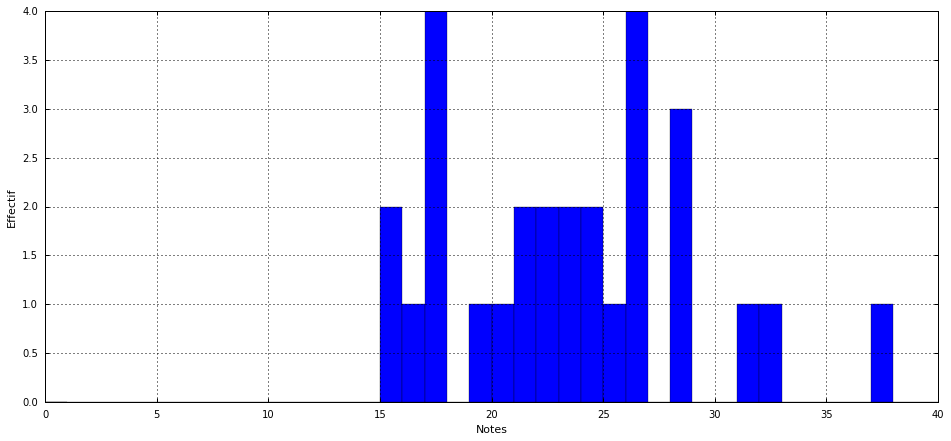

In [49]:
#notes_seules = notes[ds_name]
ax = notes[ds_name].hist(bins = barem[ds_name][0], range=(0,barem[ds_name][0]), figsize = (16,7), )
ax.set_xlabel("Notes")
ax.set_ylabel("Effectif")
#notes_seules.hist()

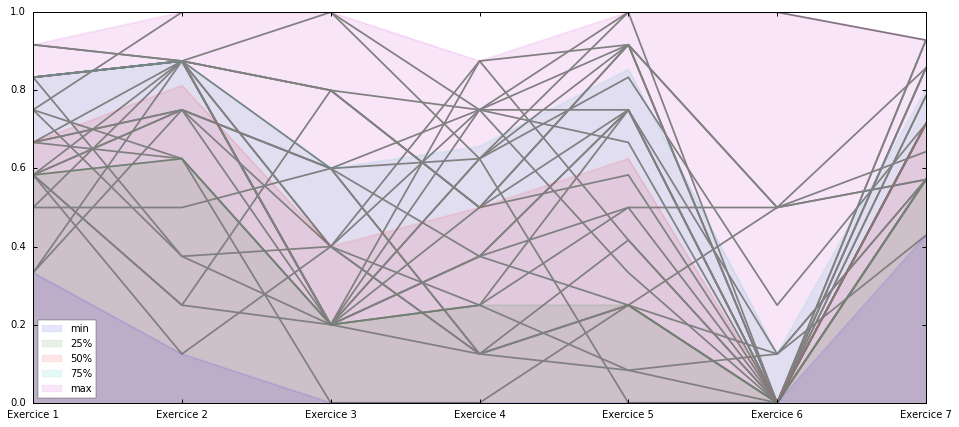

In [50]:
# Normalisation des notes de chaque exo
notes_exo_norm = notes[list_exo] / barem[list_exo].values[0,:]
#notes_exo_norm
ax = notes_exo_norm.T.plot(color = "gray", legend = False, figsize = (16, 7))
d_norm =  notes_exo_norm.describe()
d_norm.T[["min", "25%", "50%", "75%", "max"]].plot(ax=ax, kind="area", stacked = False, alpha=.1)

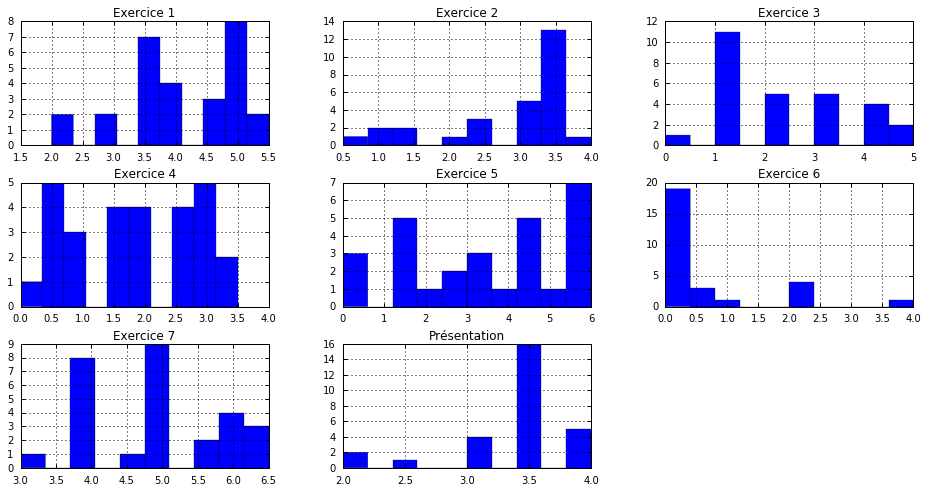

In [55]:
ax = notes[list_exo+["Présentation"]].hist(figsize = (16,8))

In [65]:
notes[notes["Exercice 4"] < 1.5]["Exercice 4"].sort_values()

BOINA HASSANI Nahimi          0.0
ABDALLAH Touraya              0.5
HALIBOU Nafilati              0.5
HOUMADI Himida                0.5
IBRAHIM Laoura                0.5
MOENY MOKO Nadjma             0.5
AHMED ABDOU El-Karim          1.0
BACO ABDALLAH Moustadirane    1.0
HOUMADI Antufati              1.0
Name: Exercice 4, dtype: float64

In [66]:
notes[notes["Exercice 5"] < 3.5]["Exercice 5"].sort_values()

YOUSSOUF Asma                0.0
AHMED ABDOU El-Karim         0.5
IBRAHIM Laoura               0.5
ABDALLAH Touraya             1.5
AHAMED Anssuifidine          1.5
BOINA HASSANI Nahimi         1.5
HALIBOU Nafilati             1.5
MOENY MOKO Nadjma            1.5
ANLI Koudoussia              2.0
HOUMADI Himida               2.5
HOUMADI ABDALLAH Abdallah    2.5
DJADAR Ifrah                 3.0
HOUMADI Antufati             3.0
Name: Exercice 5, dtype: float64

In [53]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1]

Comprendre le programme de calcul  Programme à l'envers  \
count                                  0                     0   

       Calcul literral  Construction  Pythagore  Choix proposition  \
count                0             0          0                  0   

       Probabilité « normale »  Probabilité « changement »  2 épreuves  \
count                        0                           0           0   

       Divisibilité             ...              Divisibilité  \
count             0             ...                         0   

       Utilisation du PGCD  Extraire l'information  Argumentation  Résolution  \
count                    0                       0              0           0   

       Lecture graphique  Moyenne  Total  Formule tableur (somme)  \
count                  0        0      0                        0   

       Formule tableur (moiyenne)  
count                           0  

[1 rows x 24 columns]

## Bilan à remplir

In [21]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./fill_bilan.tex","w") as f:
    f.write(bilan.render(eleves = [("Nom",, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))